Analysing One of the top viewed and subscribed channel in Youtube.

MR.Beast is 2nd most subscibed channel in Youtube. 

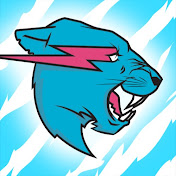

Answering questions like

1. Top 10 most viewed, Liked, Commented videos in the channel?
2. Which day does the youtuber uploaded most videos?
3. Which time does the youtuber uploaded most of the videos?
4. Any relation between views vs duration?
5. In which year did the youtuber uploaded most videos?
6. Trend of views vs years?
8. Relation between Likes vs Views Vs Duration?


In [832]:
from googleapiclient.discovery import build
import pandas as pd

In [833]:
channelid = 'UCX6OQ3DkcsbYNE6H8uQQuVA'

In [834]:
youtube = build('youtube','v3',developerKey = api_key)
youtube

In [835]:
def get_channel_stats(youtube, channelid):
    all_data =[]
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=channelid
    )
    response = request.execute()
    for item in response['items']:
        data = {'channelName': item['snippet']['title'],
        'subscribers': item['statistics']['subscriberCount'],
        'views': item['statistics']['viewCount'],
        'totalVideos': item['statistics']['videoCount'],
        'playlistId': item['contentDetails']['relatedPlaylists']['uploads']
        }

    all_data.append(data)

    return pd.DataFrame(all_data)

In [836]:
get_channel_stats(youtube, channelid)

,channelName,subscribers,views,totalVideos,playlistId
0,MrBeast,205000000,35811268534,762,UUX6OQ3DkcsbYNE6H8uQQuVA


In [837]:
video_ids = []
def get_video_ids(youtube, playlist_id):
    #video_ids = []
    request = youtube.playlistItems().list(
    part='contentDetails',
    playlistId = playlist_id,
    maxResults = 50)
    response = request.execute()
    for item in response['items']:
          video_ids.append(item['contentDetails']['videoId'])
    next_page_token = response.get('nextPageToken')
    while next_page_token is not None:
        request = youtube.playlistItems().list(
             part='contentDetails',
             playlistId = playlist_id,
             maxResults = 50,
             pageToken = next_page_token)
        response = request.execute()
        for item in response['items']:
             video_ids.append(item['contentDetails']['videoId'])
        next_page_token = response.get('nextPageToken')
    return video_ids

In [838]:
get_video_ids(youtube, 'UUX6OQ3DkcsbYNE6H8uQQuVA')


['QjvpjXdgugA',
 'jGAJCAuV3pQ',
 'c0v8OPItCOg',
 '3ryID_SwU5E',
 'IemzxkkzI5s',
 '3OFj6l2tQ9s',
 'bvlFjrcpD6s',
 'AZlBZuS4hr0',
 'Gx6VeIIbWwM',
 'CAOY8EKH1qU',
 'IQxea9UB1nQ',
 'KrLj6nc516A',
 'zgLhCT7aFCA',
 'L5kIXRdwGAI',
 '19NmWqv4Alk',
 'vBpQ1SlfVtU',
 'NnNZLCl78Ao',
 'NTZhwAldqwg',
 'J_z-W4UVHkw',
 'mKIhHNznt4s',
 'jObOjhUkf50',
 'O3YVBJ2n5xg',
 'yhB3BgJyGl8',
 'CP82DAKzL1U',
 'fuhE6PYnRMc',
 'stUofW3whpE',
 '48h57PspBec',
 'ooAwCOP67GQ',
 'FM7Z-Xq8Drc',
 'WTOm65IZneg',
 '8kggT2ej-lo',
 'GGBy50KtvRk',
 'Y4-gFIfGXiQ',
 '1WEAJ-DFkHE',
 'Y0cBiGUuB1Y',
 'YLt73w6criQ',
 'lglIQkCHO0g',
 'TJ2ifmkGGus',
 '7IKab3HcfFk',
 'h5NvTTOlOtI',
 'se50viFJ0AQ',
 '0CTp1a-aCUM',
 'FD-0KG-h2-c',
 'kX3nB4PpJko',
 'YlvcFJOE-OE',
 'iogcY_4xGjo',
 'S_CUEOBZ0P4',
 'gHzuabZUd6c',
 '65fN_OUawjk',
 'jdMNoQE3mIQ',
 '2isYuQZMbdU',
 'tVWWp1PqDus',
 'vaIgyRoUkQI',
 'Hwybp38GnZw',
 'hD1YtmKXNb4',
 'LnlKwzc_TNA',
 '3jS_yEK8qVI',
 '00NgUctWoLQ',
 'x9TQ6culXIA',
 'QbJJwaVdgIs',
 '0e3GPea1Tyg',
 'cV2gBU6hKfY',
 'qIsgdO

In [839]:
def get_video_details(youtube,video_ids):
    video_details = []
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                 part="snippet,contentDetails,statistics",
                 id=','.join(video_ids[i:i+50])
        )
        response = request.execute()
        for item in response['items']:
            
            data = {
                'Title':item['snippet']['title'],
                'Video Id':item['id'],
                'Published At':item['snippet']['publishedAt'],
                'Description':item['snippet']['description'],
                'Duration':item['contentDetails']['duration'],
                'Views':item['statistics']['viewCount'],
                #'Comments':item['statistics']['commentCount']
            }
            if 'likeCount' in item['statistics']:
                data['Likes'] = item['statistics']['likeCount']
            else:
                data['Likes'] = 0  
            if 'commentCount' in item['statistics']:
                data['Comments'] = item['statistics']['commentCount']
            else:
                data['Comments'] = 0  
            video_details.append(data)
            vdDetails = pd.DataFrame(video_details)
    return vdDetails

In [840]:
df = get_video_details(youtube,video_ids)

In [841]:
df

,Title,Video Id,Published At,Description,Duration,Views,Likes,Comments
0,World’s Deadliest Laser Maze!,QjvpjXdgugA,2023-10-28T15:59:59Z,I can’t believe what happened at the end…\nDri...,PT26M36S,58167606,2734717,69953
1,World’s Most Expensive Coffee,jGAJCAuV3pQ,2023-10-19T17:00:03Z,,PT33S,47820996,3181846,14381
2,"$100,000,000 Bathroom",c0v8OPItCOg,2023-10-17T17:00:00Z,,PT50S,61729449,3763144,9968
3,"$1 vs $100,000,000 House!",3ryID_SwU5E,2023-10-14T16:00:00Z,I can’t believe how expensive the last house i...,PT17M36S,122748023,4372148,128920
4,I Tipped A Pizza Delivery Driver A Car,IemzxkkzI5s,2023-10-12T17:30:03Z,,PT52S,113062681,7683173,14547
...,...,...,...,...,...,...,...,...
757,Most Epic minecraft skin EVER (Psy),7qj3nuF9Dzw,2013-01-13T01:59:21Z,Psy in minecraft!!! drop a like for psy's mo...,PT31S,821682,32423,3098
758,More birds IN MINECRAFT!!,Y74b7WlcEpk,2013-01-12T23:35:45Z,Basically what this mod does is adds more bird...,PT2M6S,952911,37779,3389
759,Boxy item mod Minecraft. EPIC,Z8nEEdXTaX0,2013-01-12T22:34:11Z,At the begining i said i was mrbeast6000.... i...,PT1M30S,1130858,44676,4053
760,Harry Potter Mod In Minecraft! EPIC MUST SEE M...,jP82d277Cc8,2012-03-09T23:29:03Z,One of the coolest mods i have ever seen\n\nMo...,PT3M59S,4032686,0,8042


In [842]:
df.isnull().any()

Title           False
Video Id        False
Published At    False
Description     False
Duration        False
Views           False
Likes           False
Comments        False
dtype: bool

In [843]:
df.dtypes

Title           object
Video Id        object
Published At    object
Description     object
Duration        object
Views           object
Likes           object
Comments        object
dtype: object

In [844]:
numeric_cols = ['Views', 'Likes',  'Comments']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric,errors= 'coerce')

In [845]:
df.dtypes

Title           object
Video Id        object
Published At    object
Description     object
Duration        object
Views            int64
Likes            int64
Comments         int64
dtype: object

In [846]:
from dateutil import parser
df['publishedAt'] = df['Published At'].apply(lambda x: parser.parse(x))
df['publishDayName'] = df['publishedAt'].apply(lambda x: x.strftime("%A"))
df['publishTime'] = df['publishedAt'].apply(lambda x: x.strftime("%H"))
df['publishYear'] = df['publishedAt'].apply(lambda x: x.strftime("%Y"))

In [847]:
import isodate
df['Durations'] = df['Duration'].apply(lambda x:isodate.parse_duration(x).total_seconds()/60)


In [848]:
df

,Title,Video Id,Published At,Description,Duration,Views,Likes,Comments,publishedAt,publishDayName,publishTime,publishYear,Durations
0,World’s Deadliest Laser Maze!,QjvpjXdgugA,2023-10-28T15:59:59Z,I can’t believe what happened at the end…\nDri...,PT26M36S,58167606,2734717,69953,2023-10-28 15:59:59+00:00,Saturday,15,2023,26.600000
1,World’s Most Expensive Coffee,jGAJCAuV3pQ,2023-10-19T17:00:03Z,,PT33S,47820996,3181846,14381,2023-10-19 17:00:03+00:00,Thursday,17,2023,0.550000
2,"$100,000,000 Bathroom",c0v8OPItCOg,2023-10-17T17:00:00Z,,PT50S,61729449,3763144,9968,2023-10-17 17:00:00+00:00,Tuesday,17,2023,0.833333
3,"$1 vs $100,000,000 House!",3ryID_SwU5E,2023-10-14T16:00:00Z,I can’t believe how expensive the last house i...,PT17M36S,122748023,4372148,128920,2023-10-14 16:00:00+00:00,Saturday,16,2023,17.600000
4,I Tipped A Pizza Delivery Driver A Car,IemzxkkzI5s,2023-10-12T17:30:03Z,,PT52S,113062681,7683173,14547,2023-10-12 17:30:03+00:00,Thursday,17,2023,0.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,Most Epic minecraft skin EVER (Psy),7qj3nuF9Dzw,2013-01-13T01:59:21Z,Psy in minecraft!!! drop a like for psy's mo...,PT31S,821682,32423,3098,2013-01-13 01:59:21+00:00,Sunday,01,2013,0.516667
758,More birds IN MINECRAFT!!,Y74b7WlcEpk,2013-01-12T23:35:45Z,Basically what this mod does is adds more bird...,PT2M6S,952911,37779,3389,2013-01-12 23:35:45+00:00,Saturday,23,2013,2.100000
759,Boxy item mod Minecraft. EPIC,Z8nEEdXTaX0,2013-01-12T22:34:11Z,At the begining i said i was mrbeast6000.... i...,PT1M30S,1130858,44676,4053,2013-01-12 22:34:11+00:00,Saturday,22,2013,1.500000
760,Harry Potter Mod In Minecraft! EPIC MUST SEE M...,jP82d277Cc8,2012-03-09T23:29:03Z,One of the coolest mods i have ever seen\n\nMo...,PT3M59S,4032686,0,8042,2012-03-09 23:29:03+00:00,Friday,23,2012,3.983333


C:\Users\Admin\AppData\Local\Temp\ipykernel_5304\87539948.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

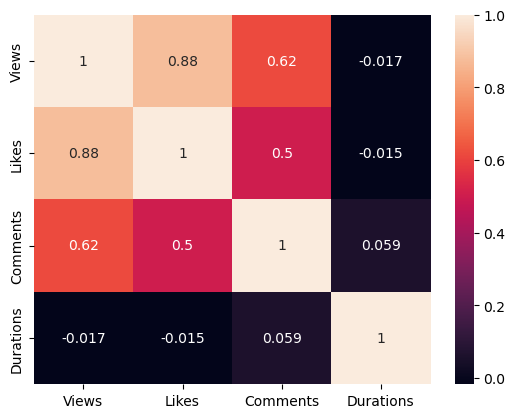

In [849]:
import seaborn as sns
sns.heatmap(df.corr(),annot= True)

In [850]:
import plotly.express as px

In [851]:
fig = px.scatter(df,x='Durations',y='Views')
fig.show()

In [852]:
top10 =  df.sort_values(by='Views', ascending=False)
top10 = top10.head(10)
top10.groupby('publishDayName')['Views','Likes'].sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5304\3277481525.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Views,Likes
publishDayName,,
Friday,418407547,25620716
Monday,341056528,15676704
Saturday,650831391,24330233
Thursday,1625526677,77118528
Tuesday,363227550,6551587
Wednesday,1454201914,47222134


In [853]:
px.bar(top10,y='Views',x='Title',title = 'Top 10 Most Viewed')

In [854]:
top10commented = df.sort_values(by='Comments',ascending = False)
top10commented= top10commented.head(10)
px.bar(top10commented, x= 'Title',y='Comments',title = 'Top 10 Commented')

In [855]:
mostliked  = df.sort_values(by = 'Likes',ascending = False)
mostliked = mostliked.head(10)
px.bar(mostliked,x='Title',y='Likes')

In [856]:
day_df = pd.DataFrame(df['publishDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
day_df

,publishDayName
Monday,65
Tuesday,87
Wednesday,80
Thursday,110
Friday,108
Saturday,198
Sunday,114


In [857]:
px.bar(day_df,y='publishDayName')

In [858]:
d1 = df[['publishTime','Views']].sort_values(by='publishTime')

In [859]:
MostCommented = df[['Comments','Title','Views','publishDayName']].sort_values(by = 'Comments',ascending = False)

In [860]:
MostCommented.head(10)

,Comments,Title,Views,publishDayName
84,744469,I Opened A Restaurant That Pays You To Eat At It,171359810,Saturday
60,620208,"$456,000 Squid Game In Real Life!",525444290,Wednesday
37,400991,"1,000 Blind People See For The First Time",162674297,Saturday
18,352496,"Every Country On Earth Fights For $250,000!",137836623,Saturday
183,307696,Make This Video The Most Liked Video On Youtube,142737740,Wednesday
124,302207,"Last To Take Hand Off $1,000,000 Keeps It",131998696,Thursday
82,287054,"Youtube Rewind 2020, Thank God It's Over",69815938,Friday
76,253679,I Spent 50 Hours Buried Alive,306325683,Saturday
91,240960,Hi Me In 5 Years,115410829,Sunday
50,236331,"I Gave My 100,000,000th Subscriber An Island",186208465,Thursday


In [861]:
px.scatter(df,x='Comments',y='Views',title = 'Comments vs Views')

In [862]:
px.scatter(df,x='Comments',y='Likes',title = 'Comments vs Likes')

In [863]:
px.scatter(df,x='Likes',y='Views',title = 'Likes Vs Views')

In [864]:
agg_functions = {
    'Views': 'sum',
    'Title':'count'
}
ty = df.groupby('publishYear').agg(agg_functions).reset_index()
ty

,publishYear,Views,Title
0,2012,23757291,2
1,2013,29887945,84
2,2014,29828486,70
3,2015,58860047,212
4,2016,256258656,89
5,2017,571328288,35
6,2018,3850385469,82
7,2019,7461523721,67
8,2020,6115052667,38
9,2021,4898784324,26


In [865]:
px.line(ty,x='publishYear',y='Title',title = 'Year vs Uploads')

In [866]:
px.line(ty,x='publishYear',y='Views',title = 'Year Vs Views')

In [867]:
px.bar(d1,x='publishTime',y='Views',title = 'Publish Time vs Views')

In [868]:
df.describe()

,Views,Likes,Comments,Durations
count,7.620000e+02,7.620000e+02,762.000000,762.000000
mean,4.705863e+07,1.434753e+06,34560.077428,19.807196
std,8.958824e+07,3.375419e+06,63639.170303,118.135615
min,3.964100e+04,0.000000e+00,0.000000,0.250000
25%,7.561125e+04,2.158500e+03,362.500000,2.983333
50%,4.603675e+05,1.507400e+04,1721.500000,4.483333
75%,5.926685e+07,1.577588e+06,49872.250000,12.533333
max,9.667777e+08,4.106409e+07,744469.000000,1440.033333


In [869]:
longestVideos = df[df['Durations']>90]
longestVideos.describe()

,Views,Likes,Comments,Durations
count,1.200000e+01,1.200000e+01,12.000000,12.000000
mean,2.314818e+07,7.865904e+05,54346.333333,805.115278
std,2.099707e+07,7.849997e+05,56850.415048,528.821571
min,7.120470e+05,2.839000e+04,0.000000,90.983333
25%,3.408364e+06,1.327368e+05,8714.250000,502.433333
50%,2.436876e+07,7.582270e+05,39351.500000,654.425000
75%,3.071396e+07,1.045095e+06,81495.500000,1418.000000
max,6.572380e+07,2.573315e+06,172494.000000,1440.033333


In [870]:
px.scatter(longestVideos,x='Durations',y='Views')

In which Years he has done these type of videos?

In [871]:
longestVideos.groupby('publishYear')['Title'].count()

publishYear
2016    3
2017    8
2018    1
Name: Title, dtype: int64

In [872]:
VideosLesthan90 = df[df['Durations']<90]

In [873]:
VideosLesthan90

,Title,Video Id,Published At,Description,Duration,Views,Likes,Comments,publishedAt,publishDayName,publishTime,publishYear,Durations
0,World’s Deadliest Laser Maze!,QjvpjXdgugA,2023-10-28T15:59:59Z,I can’t believe what happened at the end…\nDri...,PT26M36S,58167606,2734717,69953,2023-10-28 15:59:59+00:00,Saturday,15,2023,26.600000
1,World’s Most Expensive Coffee,jGAJCAuV3pQ,2023-10-19T17:00:03Z,,PT33S,47820996,3181846,14381,2023-10-19 17:00:03+00:00,Thursday,17,2023,0.550000
2,"$100,000,000 Bathroom",c0v8OPItCOg,2023-10-17T17:00:00Z,,PT50S,61729449,3763144,9968,2023-10-17 17:00:00+00:00,Tuesday,17,2023,0.833333
3,"$1 vs $100,000,000 House!",3ryID_SwU5E,2023-10-14T16:00:00Z,I can’t believe how expensive the last house i...,PT17M36S,122748023,4372148,128920,2023-10-14 16:00:00+00:00,Saturday,16,2023,17.600000
4,I Tipped A Pizza Delivery Driver A Car,IemzxkkzI5s,2023-10-12T17:30:03Z,,PT52S,113062681,7683173,14547,2023-10-12 17:30:03+00:00,Thursday,17,2023,0.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,Most Epic minecraft skin EVER (Psy),7qj3nuF9Dzw,2013-01-13T01:59:21Z,Psy in minecraft!!! drop a like for psy's mo...,PT31S,821682,32423,3098,2013-01-13 01:59:21+00:00,Sunday,01,2013,0.516667
758,More birds IN MINECRAFT!!,Y74b7WlcEpk,2013-01-12T23:35:45Z,Basically what this mod does is adds more bird...,PT2M6S,952911,37779,3389,2013-01-12 23:35:45+00:00,Saturday,23,2013,2.100000
759,Boxy item mod Minecraft. EPIC,Z8nEEdXTaX0,2013-01-12T22:34:11Z,At the begining i said i was mrbeast6000.... i...,PT1M30S,1130858,44676,4053,2013-01-12 22:34:11+00:00,Saturday,22,2013,1.500000
760,Harry Potter Mod In Minecraft! EPIC MUST SEE M...,jP82d277Cc8,2012-03-09T23:29:03Z,One of the coolest mods i have ever seen\n\nMo...,PT3M59S,4032686,0,8042,2012-03-09 23:29:03+00:00,Friday,23,2012,3.983333


In [874]:
px.scatter(VideosLesthan90,y='Views',x='Durations',title='Duration Vs Views')

In [875]:
px.scatter(VideosLesthan90,x='Durations',y='Likes',title= 'Likes Vs Duration')

In [876]:
agg_functions = {
    'Views': 'sum',
    'Likes':'sum',
    'Title':'count'
}
time = df.groupby('publishTime').agg(agg_functions).reset_index()
time

,publishTime,Views,Likes,Title
0,00,216571506,6334622,45
1,01,17197035,442253,38
2,02,75624566,3509959,23
3,03,841266,19072,4
4,04,39658,1133,1
5,06,39919,1160,1
6,10,3324207,59585,19
7,11,879969,51980,4
8,12,277877,6538,3
9,13,197639,3995,1


Mr Beast has uploaded 762 videos since 2012. His channel has seen a rapid growth from 2015 as his views got increased rapidly. He has uploaded more videos in 2015. Later the number of uploads as rapidly decreased. But the views and subscibers got increased massively. 

Mr Beast does most of the uploads on Saturday, Thrusday, Friday and Sunday. He usually uploads his videos at 8PM to 10PM.

From analysis its clear that Views, Likes, Comments are positively coorelated.

Mr Beast has does some crazy long videos during 2016,2017, 2018 the mean duration of these videos is around 805 minutes and longest is of 1140 minutes. And these videos having the lesser number of  views.

We can infer that the longer the Video the Lesser the Views.